In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# a)

def osciladores_classicos(N, E0, t_max, t_stop):

    ED = 0
    E = E0 - ED
    delta = np.sqrt((2 * E0) / (10 * N))
    
    x = np.ones(N) / (np.sqrt(2 * E0 / N))
    p = np.zeros(N)

    E_mean = 0
    ED_mean = 0
    k = 0

    for t in range(t_max):
        for i in range(N):
            dx = np.random.rand() * (2 * delta) - delta
            dp = np.random.rand() * (2 * delta) - delta
            idx_p = np.random.randint(0, N)
            
            delta_E = p[idx_p] * dp + dp * dp / 2 + x[idx_p] * dx + dx * dx/2
            
            if ED >= delta_E:
                x[idx_p] += dx
                p[idx_p] += dp
                ED += - delta_E
                E += delta_E

        if t >= t_stop:
            E_mean += E
            ED_mean += ED
            k += 1

    return (E_mean / k, ED_mean / k)


In [3]:
# b)

def osciladores_quanticos(N, E0, t_max, t_stop):

    ED = E0 - N / 2
    E = N / 2

    n = np.zeros(N)
    n_max = N

    E_mean = 0
    ED_mean = 0
    k = 0

    for t in range(t_max):
        for i in range(N):
            idx_p = np.random.randint(0, N)                
            
            if np.random.rand() <= 0.5:
                delta_E = - 1
                
                if n[idx_p] > 0:
                    n[idx_p] += - 1
                    ED += - delta_E
                    E += delta_E
            else:
                delta_E = + 1
                
                if n[idx_p] < n_max:
                    n[idx_p] += 1
                    ED += - delta_E
                    E += delta_E
            
        if t >= t_stop:
            E_mean += E
            ED_mean += ED
            k += 1
            
    return (E_mean / k, ED_mean / k)


[-28.80252055   3.09875794   7.96826606  12.24317956  16.40139724
  20.55814511  24.63717085  28.67169605  32.70350254  36.74194208
  40.75036159  44.77459866  48.80544702  52.81931611  56.82537678
  60.84567909  64.84989958  68.85847288  72.8656275   76.87887783]
[29.80252055  1.90124206  1.03173394  0.75682044  0.59860276  0.44185489
  0.36282915  0.32830395  0.29649746  0.25805792  0.24963841  0.22540134
  0.19455298  0.18068389  0.17462322  0.15432091  0.15010042  0.14152712
  0.1343725   0.12112217]
[839.216 738.168 891.113 788.155 699.223 809.406 836.477 921.545 752.981
 760.464 844.849 749.338 822.78  808.2   790.023 816.42  816.725 726.046
 767.818 829.065]
[-838.216 -733.168 -882.113 -775.155 -682.223 -788.406 -811.477 -892.545
 -719.981 -723.464 -803.849 -704.338 -773.78  -755.2   -733.023 -755.42
 -751.725 -657.046 -694.818 -752.065]


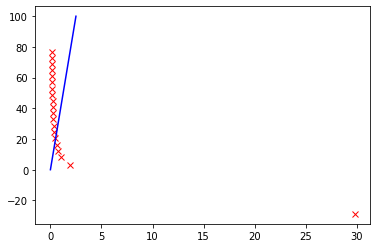

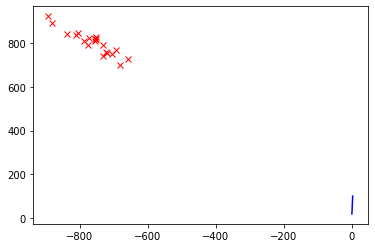

In [4]:
# c)

N = 40
t_max = 2000
t_stop = 1000

E0_vals = np.arange(1, 2 * N + 1, 4)

E_mean_class = np.zeros(len(E0_vals))
ED_mean_class = np.zeros(len(E0_vals))

k = 0
for E0 in E0_vals:
    E_mean_class[k], ED_mean_class[k] = osciladores_classicos(N, E0, t_max, t_stop)
    k += 1
    
print(E_mean_class)
print(ED_mean_class)

E_mean_qnt = np.zeros(len(E0_vals))
ED_mean_qnt = np.zeros(len(E0_vals))

k = 0
for E0 in E0_vals:
    E_mean_qnt[k], ED_mean_qnt[k] = osciladores_quanticos(N, E0, t_max, t_stop)
    k += 1

print(E_mean_qnt)
print(ED_mean_qnt)
    
plt.figure(1)
plt.plot(ED_mean_class, E_mean_class, 'xr')
plt.plot(np.arange(0, 2.5, 0.001), N * np.arange(0, 2.5, 0.001), '-b')

plt.figure(2)
plt.plot(1 / np.log(1 + 1 / ED_mean_qnt), E_mean_qnt, 'xr')
plt.plot(np.arange(0.1, 2.5, 0.001), N * (0.5 + 1 / (np.exp(1 / np.arange(0.1, 2.5, 0.001)) - 1)), '-b')

plt.show()
